In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [2]:
dataframe=pd.read_csv('diabetes.csv')

In [3]:
df=dataframe

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [10]:
#split dataset
x=df.iloc[:,0:8]
y=df.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
knn=KNeighborsClassifier(n_neighbors=11)              #Applying KNN 
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0]


In [12]:
cf=confusion_matrix(y_test,y_pred)                #confusion matrix
print(cf)

[[79 20]
 [21 34]]


<function matplotlib.pyplot.show(close=None, block=None)>

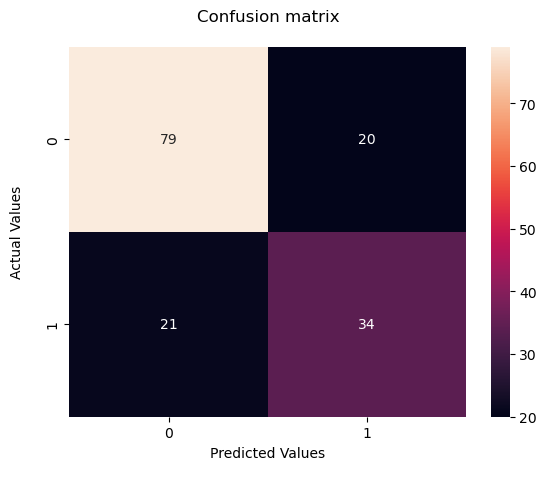

In [16]:
ax=sns.heatmap(cf,annot=True)

ax.set_title('Confusion matrix\n')
ax.set_xlabel('Predicted Values\n')
ax.set_ylabel('Actual Values\n')

plt.show

In [17]:
print(confusion_matrix.__doc__)     #Special Trick

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

In [18]:
 tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [19]:
print(tn,fp,fn,tp)                       #Confusion Matrix

79 20 21 34


In [20]:
accuracy_score(y_test,y_pred)    #Accuracy

0.7337662337662337

In [21]:
precision_score(y_test,y_pred)             #Precision

0.6296296296296297

In [22]:
recall_score(y_test,y_pred)               #Recall

0.6181818181818182

In [23]:
f1_score(y_test,y_pred)                  #F1 Score

0.6238532110091743

In [25]:
error=1-accuracy_score(y_test,y_pred)          #Error
print(error)                                      

0.26623376623376627
